In [1]:
# # Description : This program classifies persons diseases that have Diabeteise or not using machining nural network

import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k # in case I miss any methods I want to use

ModuleNotFoundError: No module named 'keras'

In [2]:
from google.colab import files #Only use for Google Colab
uploaded = files.upload()      #Only use for Google Colab
df = pd.read_csv("diabetes.csv")
    
#Print the first 5 rows
df.head()

ModuleNotFoundError: No module named 'google'

In [0]:
# get the shape of data (total number of pitents and collumn)
df.shape

(768, 9)

In [0]:
#Create a list of columns to retain
columns_to_retain = ["Pregnancies", "Glucose", "BloodPressure", "BMI",
                         "pcv", "Outcome"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [0]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [0]:
df.head()

In [0]:
#Split the data into independent'X'(the features) and dependent 'y' variables (the target)
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [0]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
BMI              float64
Outcome            int64
dtype: object

In [0]:
#from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,0].values)
df.iloc[:,0:3]

,Pregnancies,Glucose,BloodPressure
0,6,86,22
1,1,23,19
2,8,121,17
3,1,27,19
4,0,75,4
...,...,...,...
763,10,39,25
764,2,60,21
765,5,59,22
766,1,64,14


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


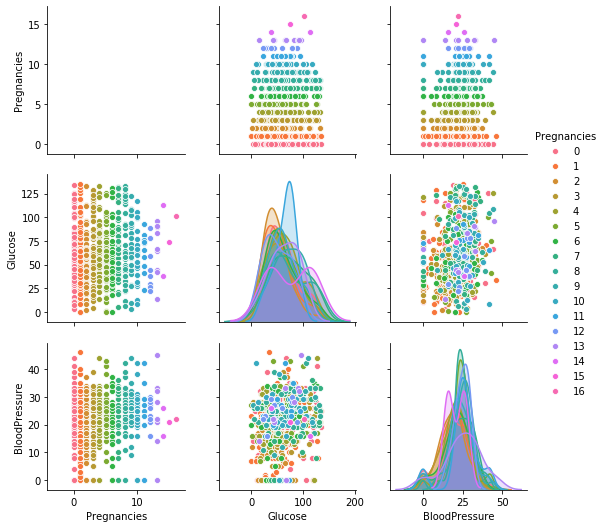

In [0]:
import seaborn as sns
sns.pairplot(df.iloc[:, 0:3], hue='Pregnancies')

In [0]:
#Feature Scaling
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [0]:
#Split the data into 80% training and 20% testing & Shuffle the data before splitting
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [0]:
#Build The model
#  The models input shape/dimensions is the number of features/columns in the data set
#  The model will have 2 layers:
#      (i) The first with 256 neurons and the ReLu activation function & a initializer which 
#          defines the way to set the initial random weights of the Keras layers. 
#          We'll use a initializer that generates tensors with a normal distribution.
#     (ii) The other layer will have 1 neuron with the activation function 'hard_sigmoid'
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),
                    kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [0]:
#Compile the model
# Loss measuers how well the model did on training , and then tries to improve on it using the optimizer.
# The loss function we will use is binary_crossentropy for binary (2) classes.
# metrics tells our accuracy 
model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#Train the model
history = model.fit(X_train, y_train, 
                    epochs=200, #The number of iterations over the entire dataset to train on
                    batch_size=X_train.shape[0]) #The number of samples per gradient update for training




Epoch 1/200





614/614 [==============================] - 1s 2ms/step - loss: 0.6938 - acc: 0.4577
Epoch 2/200
614/614 [==============================] - 0s 7us/step - loss: 0.6918 - acc: 0.6498
Epoch 3/200
614/614 [==============================] - 0s 10us/step - loss: 0.6896 - acc: 0.6466
Epoch 4/200
614/614 [==============================] - 0s 9us/step - loss: 0.6874 - acc: 0.6466
Epoch 5/200
614/614 [==============================] - 0s 8us/step - loss: 0.6852 - acc: 0.6466
Epoch 6/200
614/614 [==============================] - 0s 6us/step - loss: 0.6832 - acc: 0.6466
Epoch 7/200
614/614 [==============================] - 0s 6us/step - loss: 0.6812 - acc: 0.6466
Epoch 8/200
614/614 [==============================] - 0s 8us/step - loss: 0.6793 - acc: 0.6466
Epoch 9/200
614/614 [==============================] - 0s 7us/step - loss: 0.6775 - acc: 0.6466
Epoch 10/200
614/614 [==============================] - 0s 7us/step - loss: 0.6758 - acc: 0.6466
Epoch 11/200
614/614 [========

In [0]:
#Save the model
model.save("NN.model")

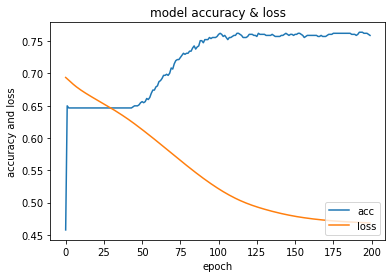

In [0]:
#Visualize the models accuracy and loss
plt.plot(history.history["acc"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [0]:
#Print the shape of the training and testing data
print("-------------------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Shape of training data:  (614, 4)
Shape of test data    :  (154, 4)
-------------------------------------------------------------------


In [0]:
#Loop through any and all saved models. Then get each models accuracy, loss, prediction and original values on the test data.
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)

  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("-------------------------------------------------------------------")
  print()

Model file:  NN.model
154/154 [==============================] - 0s 349us/step

Original  : 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0

Predicted : 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,Outcome
0,6,86,22,33.6,1
1,1,23,19,26.6,0
2,8,121,17,23.3,1
3,1,27,19,28.1,0
4,0,75,4,43.1,1


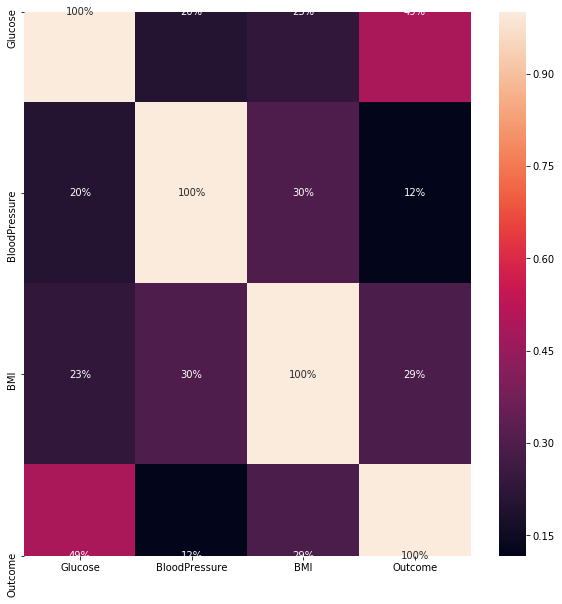

In [0]:
#Vizualize Correction
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:10].corr(), annot=True, fmt='.0%')

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [0]:
#Create a funtion for Models
def models(X_train, y_train):
  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, y_train)

  #DecisionTree
  from sklearn.tree import DecisionTreeClassifier
  tree= DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, y_train)

  #Print the models Accuracy
  print('[2]Logistic Regression: Training Accuracy:', log.score(X_train, y_train))
  print('[3]DecisionTreeClassifier: Training Accuracy:', tree.score(X_train, y_train))
  return log, tree


In [0]:
#Get all of the models
model=models(X_train, y_train)

[2]Logistic Regression: Training Accuracy: 0.7687296416938111
[3]DecisionTreeClassifier: Training Accuracy: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
